In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium as fl

In [2]:
india=pd.read_csv("india_places.csv")

In [3]:
india.info()
india.head()
india.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           1297 non-null   object 
 1   District        1297 non-null   object 
 2   City            1297 non-null   object 
 3   Population      1297 non-null   object 
 4   Area (in km^2)  1297 non-null   object 
 5   Latitude        1297 non-null   float64
 6   Longitude       1297 non-null   float64
dtypes: float64(2), object(5)
memory usage: 71.1+ KB


(1297, 7)

In [4]:
import numpy as np
india['Population'] = pd.to_numeric(india['Population'], errors='coerce')
india['Area (in km^2)'] = pd.to_numeric(india['Area (in km^2)'], errors='coerce')
india.drop_duplicates(inplace=True)
india.info()
india.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           1297 non-null   object 
 1   District        1297 non-null   object 
 2   City            1297 non-null   object 
 3   Population      1294 non-null   float64
 4   Area (in km^2)  1294 non-null   float64
 5   Latitude        1297 non-null   float64
 6   Longitude       1297 non-null   float64
dtypes: float64(4), object(3)
memory usage: 71.1+ KB


,State,District,City,Population,Area (in km^2),Latitude,Longitude
0,Andhra Pradesh,-,-,49386799.0,160205.0,16.50,80.63
1,Arunachal Pradesh,-,-,1383727.0,83743.0,27.07,93.37
2,Assam,-,-,31169272.0,78550.0,26.13,91.77
3,Bihar,-,-,104099452.0,94613.0,25.40,85.10
4,Chhattisgarh,-,-,25545198.0,135194.0,21.25,81.60


In [5]:
india_cleaned = india[((india['City'] == '-') & (india['District'] == '-'))]
print(india_cleaned)

                                       State District City   Population  \
0                             Andhra Pradesh        -    -   49386799.0   
1                          Arunachal Pradesh        -    -    1383727.0   
2                                      Assam        -    -   31169272.0   
3                                      Bihar        -    -  104099452.0   
4                               Chhattisgarh        -    -   25545198.0   
5                                        Goa        -    -    1458545.0   
6                                    Gujarat        -    -   60439692.0   
7                                    Haryana        -    -   25351462.0   
8                           Himachal Pradesh        -    -    6864602.0   
9                                  Jharkhand        -    -   32988134.0   
10                                 Karnataka        -    -   61095297.0   
11                                    Kerala        -    -   33406061.0   
12                       

In [8]:
#12,14,19,32
for i in india_cleaned[(india_cleaned['Latitude'] == 0)].index:
    state=india_cleaned.loc[i,'State']
    print(state)
    lat=float(input(f"Enter latitude of{state}"))
    india_cleaned.loc[i,'Latitude']=lat
for i in india_cleaned[(india_cleaned['Longitude']==0)].index:
    state=india_cleaned.loc[i,'State']
    lon=float(input(f"Enter longitude for {state}"))
    india_cleaned.loc[i,'Longitude']=lon

Enter longitude for Madhya Pradesh 77.94
Enter longitude for Manipur 93.90
Enter longitude for Punjab 75.34
Enter longitude for Jammu and Kashmir 76.57


In [ ]:
m=fl.Map(Location=(20.5937,78.9629),
        zoom_start=4,
         zoom_control=True
        )
for index,row in india_cleaned.iterrows():
    fl.Marker([row['Latitude'],row['Longitude']],
              popup=f"{row['State']} : Population :- {row['Population']}",
              tooltip='click me!',
              icon=fl.Icon(color='red')).add_to(m)
m.save("map1.html")
m

In [21]:
data=pd.Datafram({'User':{'User1','User2','User3','User4','User5','User6','User7','User8','User9','User10','User11','User12','User13','User14','User15'},
                  'Platform':{'facebook','twitter','facebook','facebook','twitter','twitter','instagram','instagram,'linkedin','linkedin','facebook','linkedin','instagram','instagram','twitter'
                  },'Followers'{}
                  
})

SyntaxError: unterminated string literal (detected at line 2) (3272807832.py, line 2)

In [23]:
# Create a sample DataFrame with 15 rows
social_media_data = pd.DataFrame({
    'Username': [f'user{i}' for i in range(1, 16)],
    'Followers': [np.random.randint(100, 10000) for _ in range(15)],
    'Posts': [np.random.randint(10, 500) for _ in range(15)],
    'Platform': np.random.choice(['Instagram', 'Twitter', 'Facebook', 'TikTok'], 15)
})

# Display the DataFrame
social_media_data


,Username,Followers,Posts,Platform
0,user1,2489,343,Instagram
1,user2,7505,177,Facebook
2,user3,3953,316,TikTok
3,user4,8719,109,TikTok
4,user5,8483,28,Twitter
5,user6,2259,315,Instagram
6,user7,9451,377,Twitter
7,user8,6223,314,Instagram
8,user9,3469,224,Twitter
9,user10,5530,282,Twitter


<Axes: xlabel='Followers', ylabel='Count'>

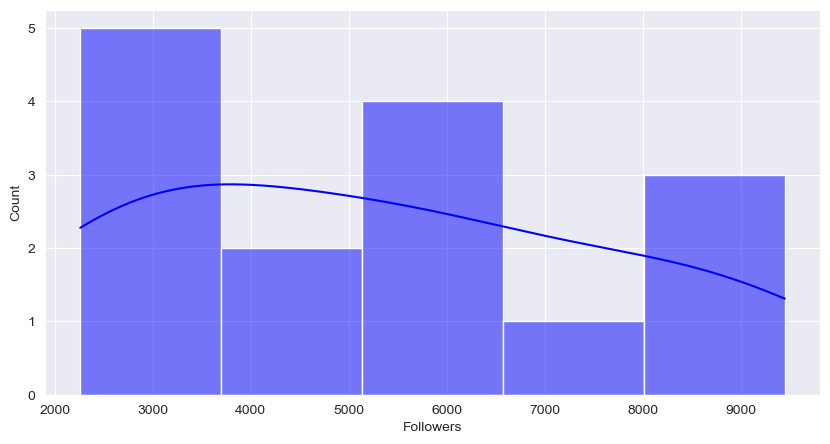

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.histplot(data=social_media_data,x='Followers',bins=5,kde=True,color='blue')


In [29]:
from scipy.stats import skew  
followers_skewness = skew(social_media_data['Followers'])
posts_skewness = skew(social_media_data['Posts'])

print(f"Skewness of Followers: {followers_skewness:.2f}")
print(f"Skewness of Posts: {posts_skewness:.2f}")


Skewness of Followers: 0.32
Skewness of Posts: -0.60
